<a href="https://colab.research.google.com/github/Vinyaskalmakki/autiomatic-licence-plate-number-detection-using-AI-ML/blob/main/Final_Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,992 kB/s)
debconf: unable to initi

In [ ]:
!pip install pytesseract

     |████████████████████████████████| 3.1 MB 5.2 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import cv2
import imutils
import pytesseract
try:
    from PIL import Image
except ImportError:
    import Image
from google.colab.patches import cv2_imshow
from google.colab import files
import os

Saving car.jpeg to car.jpeg


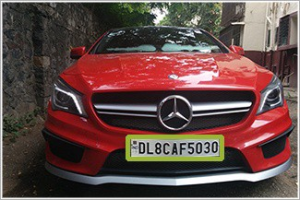

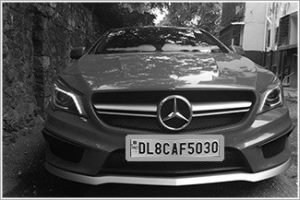

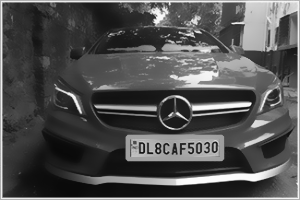

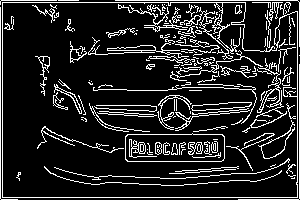

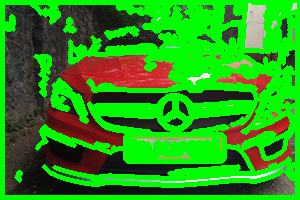

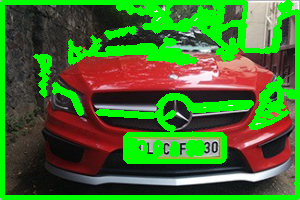

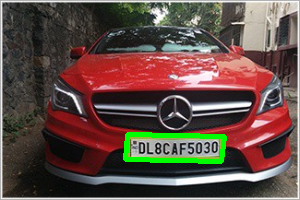

Number plate is: DL8CAF5030

Car Belongs to Delhi


In [ ]:
states={"AN":"Andaman and Nicobar","AP":"Andhra Pradesh","AR":"Arunachal Pradesh","AS":"Assam","BR":"Bihar","CH":"Chandigarh","DN":"Dadra and Nagar Haveli","DD":"Daman and Diu","DL":"Delhi","GA":"Goa","GJ":"Gujarat",
"HR":"Haryana","HP":"Himachal Pradesh","JK":"Jammu and Kashmir","KA":"Karnataka","KL":"Kerala","LD":"Lakshadweep","MP":"Madhya Pradesh","MH":"Maharashtra","MN":"Manipur","ML":"Meghalaya","MZ":"Mizoram","NL":"Nagaland","OD":"Odissa","PY":"Pondicherry","PN":"Punjab","RJ":"Rajasthan","SK":"Sikkim","TN":"TamilNadu","TR":"Tripura","UP":"Uttar Pradesh", "WB":"West Bengal","CG":"Chhattisgarh","TS":"Telangana","JH":"Jharkhand","UK":"Uttarakhand"}

img = files.upload()
for fn in img.keys():
  image1=fn
image=cv2.imread(image1)
image = imutils.resize(image, width=300 )
cv2_imshow(image)
cv2.waitKey(0)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
cv2.waitKey(0)

gray_image = cv2.bilateralFilter(gray_image, 11, 17, 17) 
cv2_imshow(gray_image)
cv2.waitKey(0)

edged = cv2.Canny(gray_image, 30, 200) 
cv2_imshow(edged)
cv2.waitKey(0)

cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1=image.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
cv2_imshow(image1)
cv2.waitKey(0)

cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
screenCnt = 0
image2 = image.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
cv2_imshow(image2)
cv2.waitKey(0)

i=7
for c in cnts:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) == 4: 
                screenCnt = approx
                x,y,w,h = cv2.boundingRect(c)
                new_img=image[y:y+h,x:x+w]
                cv2.imwrite('./'+str(i)+'.png',new_img)
                i+=1
                break

cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)
cv2_imshow(image)
cv2.waitKey(0)

Cropped_loc = './7.png'
cv2_imshow(cv2.imread(Cropped_loc))
plate = pytesseract.image_to_string(Cropped_loc, lang='eng')
print("Number plate is:", plate)
read = pytesseract.image_to_string(Cropped_loc, lang='eng')
read = ''.join(e for e in read if e.isalnum())
stat = read[0:2]
try:
        print('Car Belongs to',states[stat])
except:
        print('State not recognised!!')
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
|